In [ ]:
from math import log, sqrt, pi, exp
from scipy.stats import norm
from datetime import datetime, date
import numpy as np
import pandas as pd
from pandas import DataFrame

# Logic for Binomial Options

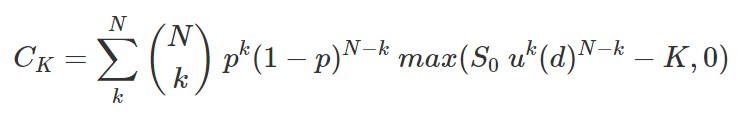

In [ ]:
"""
Whoever doing the GUI remember to edit this part to make sure it links!
"""

N = 
S0  = 
T = 
sigma = 
K = 
r = 

"""
SAMPLE VALUES FOR THE ABOVE PORTIONS
N = 165
S0  = 366.62
T = 0.65
sigma = 0.24
K = 150
r = 0.05
"""

def combos(n, i):
    return math.factorial(n) / (math.factorial(n-i)*math.factorial(i))
    

def binom(S0, K , T, r, sigma, N, is_call = True, is_eu = True):
    dt = T/N
    u = np.exp(sigma * np.sqrt(dt))
    d = np.exp(-sigma * np.sqrt(dt))
    p = (  np.exp(r*dt) - d )  /  (  u - d )
    disc = np.exp(-r*dt)
    value = 0 
    
    if is_eu == True: #for eu option
        for i in range(N+1):
            node_prob = combos(N, i)*p**i*(1-p)**(N-i)
            ST = S0*(u)**i*(d)**(N-i)
            if is_call == True:
                value += max(ST-K,0) * node_prob
            else:
                value += max(K-ST, 0)*node_prob
        
        return value*np.exp(-r*T)
    
    else: #for american option
        S = np.zeros(N+1)
        for j in range(0, N+1):
            S[j] = S0 * u**j * d**(N-j)
        # option payoff 
        C = np.zeros(N+1)
        for j in range(0, N+1):
            if is_call == False:
                C[j] = max(0, K - S[j])
            else:
                C[j] = max(0, S[j] - K)

        # backward recursion through the tree
        for i in np.arange(N-1,-1,-1):
            for j in range(0,i+1):
                S = S0 * u**j * d**(i-j)
                C[j] = disc * ( p*C[j+1] + (1-p)*C[j] )
                if is_call == False:
                    C[j] = max(C[j], K - S)
                else:
                    C[j] = max(C[j], S - K)

        return C[0]

binom(S0, K, T, r,sigma, N, True, True)

# Logic for Black Scholes Model

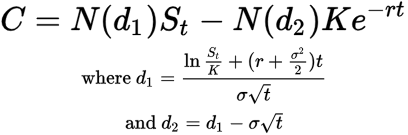

In [ ]:
"""
Whoever doing the GUI remember to edit this part to make sure it links!
"""

S = 
K = 
T = 
r = 
sigma = 


def black_scholes(S, K , T, r, sigma, is_call = True):
    d1 = (log(S/K)+(r+sigma**2/2.)*T)/sigma*sqrt(T)
    d2 = d1(S,K,T,r,sigma)-sigma*sqrt(T)
    
    if is_call == True: 
        return S*norm.cdf(d1(S,K,T,r,sigma))-K*exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma))
    
    else: 
        return K*exp(-r*T)-S+bs_call(S,K,T,r,sigma)

black_scholes(S, K, T, r,sigma, True)

# IGNORE BELOW FOR NOW

In [ ]:
"""
IGNORE THIS PORTION FOR NOW
"""

## input the current stock price and check if it is a number.
S = input("What is the current stock price? ");
while True:
    try:
        S = float(S)
        break
    except:
        print("The current stock price has to be a NUMBER.")
        S = input("What is the current stock price? ")

## input the strike price and check if it is a number.
K = input("What is the strike price? ");
while True:
    try:
        K = float(K)
        break
    except:
        print("The the strike price has to be a NUMBER.")
        K = input("What is the strike price? ")


## input the expiration_date and calculate the days between today and the expiration date.
while True:
    expiration_date = input("What is the expiration date of the options? (mm-dd-yyyy) ")
    try:
        expiration_date = datetime.strptime(expiration_date, "%m-%d-%Y")
    except ValueError as e:
        print("error: %s\nTry again." % (e,))
    else:
        break
T = (expiration_date - datetime.utcnow()).days / 365


## input the continuously compounding risk-free interest rate and check if it is a number.
r = input("What is the continuously compounding risk-free interest rate in percentage(%)? ");
while True:
    try:
        r = float(r)
        break
    except:
        print("The continuously compounding risk-free interest rate has to be a NUMBER.")
        r = input("What is the continuously compounding risk-free interest rate in percentage(%)? ")
        

## input the volatility and check if it is a number.
sigma = input("What is the volatility in percentage(%)? "); 
while True:
    try:
        sigma = float(sigma)
        if sigma > 100 or sigma < 0:
            print ( "The range of sigma has to be in [0,100].")
            sigma = input("What is the volatility in percentage(%)? ")
        break
    except:
        print("The volatility has to be a NUMBER.")
        sigma = input("What is the volatility in percentage(%)? ")
        
## define the Call_Greeks of an option
def call_delta(S,K,T,r,sigma):
    return norm.cdf(d1(S,K,T,r,sigma))
def call_gamma(S,K,T,r,sigma):
    return norm.pdf(d1(S,K,T,r,sigma))/(S*sigma*sqrt(T))
def call_vega(S,K,T,r,sigma):
    return 0.01*(S*norm.pdf(d1(S,K,T,r,sigma))*sqrt(T))
def call_theta(S,K,T,r,sigma):
    return 0.01*(-(S*norm.pdf(d1(S,K,T,r,sigma))*sigma)/(2*sqrt(T)) - r*K*exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma)))
def call_rho(S,K,T,r,sigma):
    return 0.01*(K*T*exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma)))

## define the Put_Greeks of an option
def put_delta(S,K,T,r,sigma):
    return -norm.cdf(-d1(S,K,T,r,sigma))
def put_gamma(S,K,T,r,sigma):
    return norm.pdf(d1(S,K,T,r,sigma))/(S*sigma*sqrt(T))
def put_vega(S,K,T,r,sigma):
    return 0.01*(S*norm.pdf(d1(S,K,T,r,sigma))*sqrt(T))
def put_theta(S,K,T,r,sigma):
    return 0.01*(-(S*norm.pdf(d1(S,K,T,r,sigma))*sigma)/(2*sqrt(T)) + r*K*exp(-r*T)*norm.cdf(-d2(S,K,T,r,sigma)))
def put_rho(S,K,T,r,sigma):
    return 0.01*(-K*T*exp(-r*T)*norm.cdf(-d2(S,K,T,r,sigma)))

## make a DataFrame of these inputs

data = {'Symbol': ['S', 'K', 'T', 'r', 'sigma'],
        'Input': [S, K, T , r , sigma]}
input_frame = DataFrame(data, columns=['Symbol', 'Input'], 
                   index=['Underlying price', 'Strike price', 'Time to maturity', 'Risk-free interest rate', 'Volatility'])
input_frame

## calculate the call / put option price and the greeks of the call / put option
r = r/100; sigma = sigma/100;
price_and_greeks = {'Call' : [bs_call(S,K,T,r,sigma), call_delta(S,K,T,r,sigma), call_gamma(S,K,T,r,sigma),call_vega(S,K,T,r,sigma), call_rho(S,K,T,r,sigma), call_theta(S,K,T,r,sigma)],
                    'Put' : [bs_put(S,K,T,r,sigma), put_delta(S,K,T,r,sigma), put_gamma(S,K,T,r,sigma),put_vega(S,K,T,r,sigma), put_rho(S,K,T,r,sigma), put_theta(S,K,T,r,sigma)]}
price_and_greeks_frame = DataFrame(price_and_greeks, columns=['Call','Put'], index=['Price', 'delta', 'gamma','vega','rho','theta'])
price_and_greeks_frame

## Template for PyQt5 GUI from Week 2 Content

In [ ]:
import sys
from PyQt5.QtWidgets import QMainWindow, QApplication
from PyQt5 import uic
import math

qtCreatorFile = "HDBLoanCalculator.ui"
Ui_MainWindow, QtBaseClass = uic.loadUiType(qtCreatorFile)

class Main(QMainWindow, Ui_MainWindow):
    def __init__(self):        
        super().__init__()
        self.setupUi(self)
        
        self.label_RepaymentPeriod.setText(
                "<span style='font-size:18pt;'>"
                "Repayment Period (In Years)"
                "</span><span style='font-size:12pt;'>"
                "  (Between 1-25 years)"
                "</span>"
                )
        
        self.pushButton_Calculate.clicked.connect(self.PB_C)
        
    def PB_C(self):
        #--------------------START------------------------------
        print('Write code here.')
        print(self.lineEdit_LoanAmount.text(), 
              type(self.lineEdit_LoanAmount.text()))
        print(self.lineEdit_RepaymentPeriod.text())
        print(self.lineEdit_InterestRateOfLoan.text())
        self.lineEdit_MonthlyInstallment.setText('Write Answer')
        
        PV = float(self.lineEdit_LoanAmount.text())
        t = int(self.lineEdit_RepaymentPeriod.text())
        r = float(self.lineEdit_InterestRateOfLoan.text())/100
        
        P=(r/12*PV)/(1-(1+r/12)**(-12*t))
        P = str(math.ceil(P))
        
        self.lineEdit_MonthlyInstallment.setText(P)
        #-------------------- END ------------------------------
        # 0. Comment the above 6 lines of code.
        # 1. Use the template to get strings from GUI components.        
        # 2. Convert strings to numbers.
        # 3. Use variables.
        # 4. Write an expression to calcualte, including rounding.
        # 5. Convert the result from number to string.
        # 6. Use the template to output the string to the GUI component. 

if __name__ == '__main__':

    app = QApplication(sys.argv)
    main = Main()
    main.show()
    sys.exit(app.exec_())

# Final Black Scholes Code 

In [ ]:
import sys
import math
from PyQt5.QtWidgets import QMainWindow, QApplication
from PyQt5 import uic
from scipy.stats import norm

qtCreatorFile = "black_scholes_calc.ui" 
Ui_MainWindow, QtBaseClass = uic.loadUiType(qtCreatorFile)

# this is to teach simple arithmetic operations, variables, so supplement with other methods like binom

# define your own class for option pricing, and not for GUI, for calculation

# using QmainWindow and Ui_MainWindow are base classes, so too complicated, shouldn't use to teach


class Main(QMainWindow, Ui_MainWindow):
    def __init__(self):
        super().__init__()
        self.setupUi(self)

        self.pushButton_Calculate.clicked.connect(self.calculate_option_price)
        self.pushButton_Reset.clicked.connect(self.reset_fields)

    def calculate_option_price(self):
        # Explain how to use float, how to store numbers and strings (different literals)
        S = float(self.lineEdit_SpotPrice.text())
        K = float(self.lineEdit_StrikePrice.text())
        T = float(self.lineEdit_TimetoExpiry.text())
        r = float(self.lineEdit_InterestRate.text()) / 100
        sigma = float(self.lineEdit_Volatility.text()) / 100
        d = float(self.lineEdit_Dividend.text()) / 100

        # when opening up the GUI, show how to convert string to number, and number to string
        # define another class for option pricing,write the calculation in the global space, don't calculate directly 
        # call the option pricing function inside the GUI class
        d1 = (math.log(S / K) + (r - d + (sigma ** 2) / 2) * T) / (sigma * (T ** 0.5))
        d2 = d1 - sigma * (T ** 0.5)

        call_price = S * math.e**(-d * T) * norm.cdf(d1) - K * math.e**(-r * T) * norm.cdf(d2)
        put_price = K * math.e**(-r * T) * norm.cdf(-d2) - S * math.e**(-d * T) * norm.cdf(-d1)

        # Keep these two lines
        self.lineEdit_CallPrice.setText(f"{call_price:.2f}")
        self.lineEdit_CallPrice_2.setText(f"{put_price:.2f}")

    def reset_fields(self):
        self.lineEdit_SpotPrice.clear()
        self.lineEdit_StrikePrice.clear()
        self.lineEdit_TimetoExpiry.clear()
        self.lineEdit_InterestRate.clear()
        self.lineEdit_Volatility.clear()
        self.lineEdit_Dividend.clear()
        self.lineEdit_CallPrice.clear()
        self.lineEdit_CallPrice_2.clear()

if __name__ == '__main__':
    app = QApplication(sys.argv)
    main = Main()
    main.show()
    sys.exit(app.exec_())


# Binom Logic Code

In [ ]:
# in chapter 1, tell them what they can learn from the report (important chapter)

"""
Whoever doing the GUI remember to edit this part to make sure it links!
"""

N = 
S0  = 
T = 
sigma = 
K = 
r = 

"""
SAMPLE VALUES FOR THE ABOVE PORTIONS
N = 165
S0  = 366.62
T = 0.65
sigma = 0.24
K = 150
r = 0.05
"""

# store subscript symbols
# can store inputs in dictionary, tuples
# can teach loop

def combos(n, i):
    return math.factorial(n) / (math.factorial(n-i)*math.factorial(i))
    

def binom(S0, K , T, r, sigma, N, is_call = True, is_eu = True):
    dt = T/N
    u = np.exp(sigma * np.sqrt(dt))
    d = np.exp(-sigma * np.sqrt(dt))
    p = (  np.exp(r*dt) - d )  /  (  u - d )
    disc = np.exp(-r*dt)
    value = 0 
    
    if is_eu == True: #for eu option
        
        # can write how to use for statement and list comprehension
        # "how to use list comprehension to create a list"
        # "how to store fij in python? in my report, you will see how to use dictionary to store fij"
        # can teach a more advance features! 
        for i in range(N+1):
            node_prob = combos(N, i)*p**i*(1-p)**(N-i)
            ST = S0*(u)**i*(d)**(N-i)
            if is_call == True:
                value += max(ST-K,0) * node_prob
            else:
                value += max(K-ST, 0)*node_prob
        
        return value*np.exp(-r*T)
    
    else: #for american option
        S = np.zeros(N+1)
        for j in range(0, N+1):
            S[j] = S0 * u**j * d**(N-j)
        # option payoff 
        C = np.zeros(N+1)
        for j in range(0, N+1):
            if is_call == False:
                C[j] = max(0, K - S[j])
            else:
                C[j] = max(0, S[j] - K)

        # backward recursion through the tree
        for i in np.arange(N-1,-1,-1):
            for j in range(0,i+1):
                S = S0 * u**j * d**(i-j)
                C[j] = disc * ( p*C[j+1] + (1-p)*C[j] )
                if is_call == False:
                    C[j] = max(C[j], K - S)
                else:
                    C[j] = max(C[j], S - K)

        return C[0]

binom(S0, K, T, r,sigma, N, True, True)